<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:skyblue;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:black;
              text-align:center;'>
        FLIGHT FARE PREDICTION
    </h2>
    </div>

**An airline company provides air transport services for traveling passengers.
Airlines assign prices to their services in an attempt to maximize profitability. The pricing of airline tickets has become increasingly complicated over the years.**

**The price of an Airline Ticket is affected by a number of factors, such as flight duration, days left for departure, arrival time and departure time, arrival cities etc.
The goal is to build a model that accurately predicts flight prices to help travelers save time and money.**


## About Dataset

We have 2 datasets here — training set and test set.

The training set contains the features, along with the prices of the flights. It contains 10683 records, 10 input features and 1 output column — ‘Price’.

The test set contains 2671 records and 10 input features. The output ‘Price’ column needs to be predicted in this set. 

We will use Regression techniques here, since the predicted output will be a continuous value.

### Features Information

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

### Importing the Necessary Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train_data = pd.read_excel('Data_Train.xlsx')
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
train_data.shape

(10683, 11)

In [6]:
test_data = pd.read_excel('Test_set.xlsx')
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [8]:
test_data.shape

(2671, 10)

### Duplicates Information

In [11]:
train_data[train_data.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [12]:
train_data_copy = train_data.copy(deep= True)

In [14]:
train_data.drop_duplicates(inplace=True)

In [17]:
train_data.reset_index(inplace = True,drop = True)

In [18]:
train_data.shape

(10463, 11)

### EDA

In [20]:
null_counts = train_data.isnull().sum()
null_counts[null_counts>0]

Route          1
Total_Stops    1
dtype: int64

In [23]:
train_data[(train_data['Route'].isnull()) | (train_data['Total_Stops'].isnull())]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
8893,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [25]:
train_data.dropna(inplace = True)

In [26]:
train_data.reset_index(inplace = True,drop = True)

In [29]:
train_data.shape

(10462, 11)

In [30]:
train_data_copy.shape

(10683, 11)

After removing all the unwanted records we are left with 10462 out of 10683

In [31]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10462 entries, 0 to 10461
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 899.2+ KB


In [34]:
from warnings import filterwarnings
filterwarnings('ignore')

In [43]:
train_data['Date_of_Journey'] = pd.to_datetime(train_data['Date_of_Journey'])

In [42]:
train_data.drop('DOJ',axis = 1,inplace = True)

In [44]:
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10457,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10458,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10459,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10460,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [45]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10462 entries, 0 to 10461
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10462 non-null  object        
 1   Date_of_Journey  10462 non-null  datetime64[ns]
 2   Source           10462 non-null  object        
 3   Destination      10462 non-null  object        
 4   Route            10462 non-null  object        
 5   Dep_Time         10462 non-null  object        
 6   Arrival_Time     10462 non-null  object        
 7   Duration         10462 non-null  object        
 8   Total_Stops      10462 non-null  object        
 9   Additional_Info  10462 non-null  object        
 10  Price            10462 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 899.2+ KB


In [47]:
train_data['Year'] = train_data['Date_of_Journey'].dt.year

In [48]:
train_data['Month'] = train_data['Date_of_Journey'].dt.month

In [50]:
train_data['Date'] = train_data['Date_of_Journey'].dt.day

In [52]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,Date
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,5,1


In [53]:
train_data.drop('Date_of_Journey',axis = 1,inplace = True)

In [54]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10462 entries, 0 to 10461
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Source           10462 non-null  object
 2   Destination      10462 non-null  object
 3   Route            10462 non-null  object
 4   Dep_Time         10462 non-null  object
 5   Arrival_Time     10462 non-null  object
 6   Duration         10462 non-null  object
 7   Total_Stops      10462 non-null  object
 8   Additional_Info  10462 non-null  object
 9   Price            10462 non-null  int64 
 10  Year             10462 non-null  int32 
 11  Month            10462 non-null  int32 
 12  Date             10462 non-null  int32 
dtypes: int32(3), int64(1), object(9)
memory usage: 940.1+ KB


#### Dep_Time    
Similarly now will extract hours and minutes from Dep_Time

In [55]:
train_data.Dep_Time.dtype

dtype('O')

In [59]:
train_data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,Date
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,5,1


In [60]:
train_data['Dep_hrs'] = pd.to_datetime(train_data.Dep_Time).dt.hour

In [61]:
train_data['Dep_mins'] = pd.to_datetime(train_data.Dep_Time).dt.minute

In [62]:
train_data.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,Date,Dep_hrs,Dep_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,6,9,9,25


In [63]:
train_data.drop('Dep_Time',axis = 1,inplace = True)

### Arrival_Time

In [67]:
train_data['Arrival_hrs'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour

In [68]:
train_data['Arrival_mins'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute

In [69]:
train_data.drop('Arrival_Time',axis = 1,inplace = True)

In [70]:
train_data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Year,Month,Date,Dep_hrs,Dep_mins,Arrival_hrs,Arrival_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,5,1,5,50,13,15


In [71]:
train_data.shape

(10462, 15)

### Duration

In [73]:
2 * 60 + 50

170

In [76]:
type(train_data['Duration'][0])

str

In [117]:
train_data['Duration'][0].split()

['2h', '50m']

In [88]:
train_data['Duration'][0].split()[0].split('h')[0]

'2'

In [90]:
train_data['Duration'][0].split()[1].split('m')[0]

'50'

In [93]:
type(train_data.Duration[0])

str

In [92]:
train_data.Duration[0]

'2h 50m'

In [115]:
train_data.Duration[0].split(' ')

['2h', '50m']

In [95]:
train_data.Duration[0].split(' ')[0]

'2h'

In [96]:
train_data.Duration[0].split(' ')[0].split('h')

['2', '']

In [97]:
train_data.Duration[0].split(' ')[0].split('h')[0]

'2'

In [100]:
train_data.Duration[0].split(' ')[1].split('m')[0]

'50'

In [120]:
duration = list(train_data['Duration'])

duration_hrs = []
duration_mins = []

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]


for i in range(len(duration)):
    duration_hrs.append(int(duration[i].split(' ')[0].split('h')[0]))
    duration_mins.append(int(duration[i].split(' ')[1].split('m')[0]))

In [ ]:
duration = list(train_data['Duration'])

duration_hrs = []
duration_mins = []

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]


for i in range(len(duration)):
    duration_hrs.append(int(duration[i].split(' ')[0].split('h')[0]))
    duration_mins.append(int(duration[i].split('m')[0].split()[-1]))

In [136]:
duration_hm = []
for i in duration_hrs:
    duration_hm.append(i*60)

In [142]:
print(duration_hm)

[120, 420, 1140, 300, 240, 120, 900, 1260, 1500, 420, 780, 120, 120, 720, 120, 1560, 240, 1320, 1380, 1200, 300, 900, 120, 120, 780, 900, 300, 300, 120, 120, 120, 780, 120, 1320, 300, 600, 300, 120, 360, 660, 660, 480, 1320, 120, 720, 120, 120, 120, 960, 1140, 180, 1500, 120, 180, 120, 960, 900, 120, 360, 1500, 720, 1620, 600, 600, 120, 600, 120, 60, 780, 120, 60, 1560, 420, 780, 300, 120, 120, 60, 1140, 120, 840, 120, 1320, 540, 600, 1260, 300, 1080, 720, 1080, 540, 660, 1020, 780, 120, 120, 120, 180, 60, 960, 720, 720, 420, 1440, 120, 480, 420, 840, 1800, 1140, 900, 120, 720, 600, 300, 900, 960, 600, 120, 660, 120, 60, 840, 1200, 120, 1380, 1080, 960, 120, 120, 480, 960, 180, 120, 840, 1380, 1260, 1260, 120, 600, 480, 480, 300, 480, 660, 1620, 480, 1200, 240, 480, 120, 1440, 120, 720, 720, 1380, 960, 120, 1500, 1560, 1680, 120, 1500, 540, 240, 900, 60, 120, 540, 120, 1320, 180, 660, 540, 720, 1020, 300, 1500, 1200, 780, 1080, 60, 540, 960, 120, 240, 300, 1440, 120, 120, 240, 1500, 36

In [143]:
print(duration_mins)

[50, 25, 0, 25, 45, 25, 30, 5, 30, 50, 15, 35, 15, 10, 35, 35, 30, 35, 0, 35, 10, 20, 50, 55, 20, 10, 45, 55, 50, 15, 15, 25, 50, 0, 30, 25, 15, 30, 15, 55, 5, 30, 5, 45, 0, 50, 50, 15, 5, 55, 15, 20, 50, 0, 50, 15, 5, 15, 30, 5, 25, 20, 15, 30, 15, 25, 50, 30, 20, 15, 25, 30, 20, 30, 0, 45, 50, 30, 5, 15, 50, 40, 10, 35, 0, 20, 25, 45, 20, 0, 15, 5, 30, 20, 35, 25, 40, 0, 25, 35, 20, 15, 30, 0, 45, 55, 10, 30, 20, 55, 0, 55, 45, 10, 55, 25, 5, 10, 40, 55, 40, 25, 5, 15, 25, 10, 10, 0, 50, 20, 0, 55, 10, 45, 0, 50, 40, 15, 45, 50, 0, 15, 25, 35, 50, 35, 25, 55, 50, 10, 20, 25, 50, 20, 15, 35, 35, 50, 45, 10, 50, 45, 15, 20, 30, 25, 30, 40, 10, 45, 35, 5, 30, 30, 10, 35, 5, 50, 0, 0, 25, 30, 30, 0, 20, 30, 45, 10, 35, 45, 55, 35, 20, 5, 40, 15, 10, 25, 50, 25, 15, 50, 15, 50, 20, 55, 35, 35, 30, 20, 55, 15, 5, 45, 55, 30, 40, 45, 55, 0, 45, 15, 25, 15, 55, 50, 25, 50, 30, 30, 40, 35, 15, 30, 45, 35, 30, 55, 55, 15, 40, 30, 0, 15, 15, 50, 10, 25, 20, 30, 10, 30, 20, 35, 15, 20, 45, 0, 0,

In [144]:
train_data['Duration_mins'] = [i+j  for i,j  in zip(duration_hm, duration_mins)]

In [146]:
train_data.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Year,Month,Date,Dep_hrs,Dep_mins,Arrival_hrs,Arrival_mins,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,5,1,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,2019,6,9,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,2019,5,12,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,2019,3,1,16,50,21,35,285


In [147]:
train_data.drop('Duration',axis = 1,inplace = True)

In [148]:
train_data.shape

(10462, 15)

In [150]:
train_data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Year,Month,Date,Dep_hrs,Dep_mins,Arrival_hrs,Arrival_mins,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,2019,3,24,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,2019,5,1,5,50,13,15,445


### which is the most busiest airline

<Axes: xlabel='Airline'>

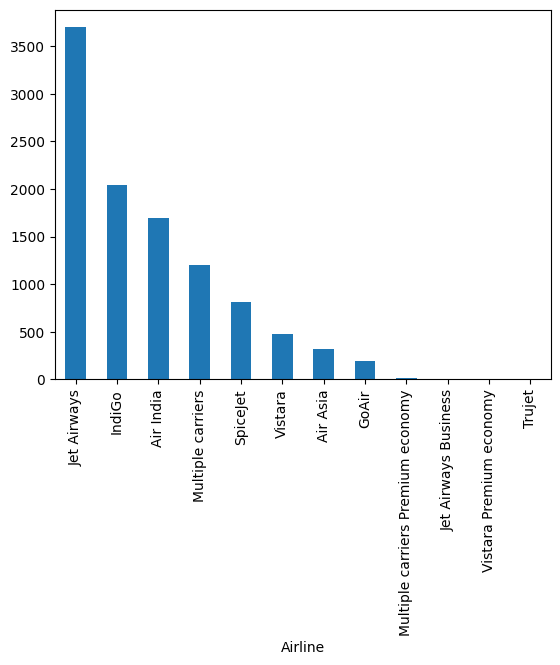

In [167]:
train_data.Airline.value_counts().plot(kind = 'bar')

In [152]:
train_data.Source.value_counts()

Source
Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [153]:
train_data.Destination.value_counts()

Destination
Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

<Axes: xlabel='Route'>

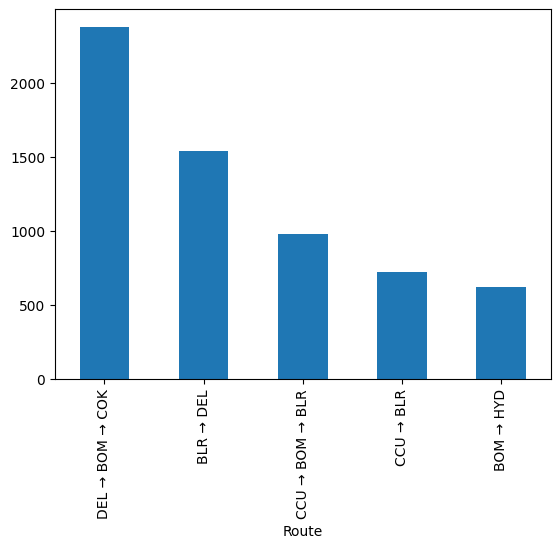

In [168]:
train_data.Route.value_counts().head(5).plot(kind = 'bar')

In [157]:
train_data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

<Axes: xlabel='Total_Stops'>

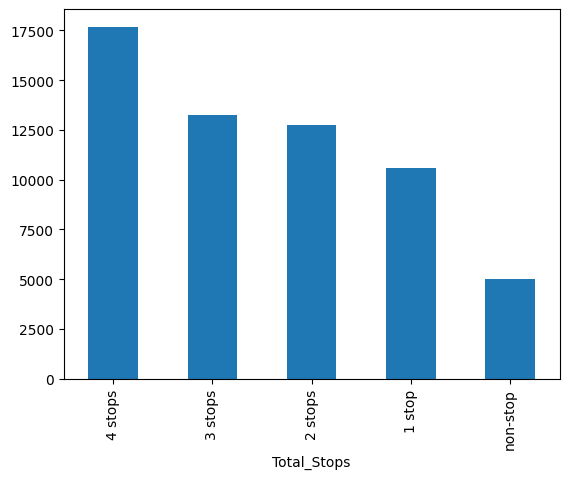

In [166]:
train_data.groupby('Total_Stops')['Price'].mean().sort_values(ascending = False).plot(kind = 'bar')

In [158]:
train_data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Year', 'Month', 'Date', 'Dep_hrs',
       'Dep_mins', 'Arrival_hrs', 'Arrival_mins', 'Duration_mins'],
      dtype='object')

In [163]:
train_data['Duration_mins'].corr(train_data['Price'])

0.5017579376022412

<Axes: xlabel='Airline'>

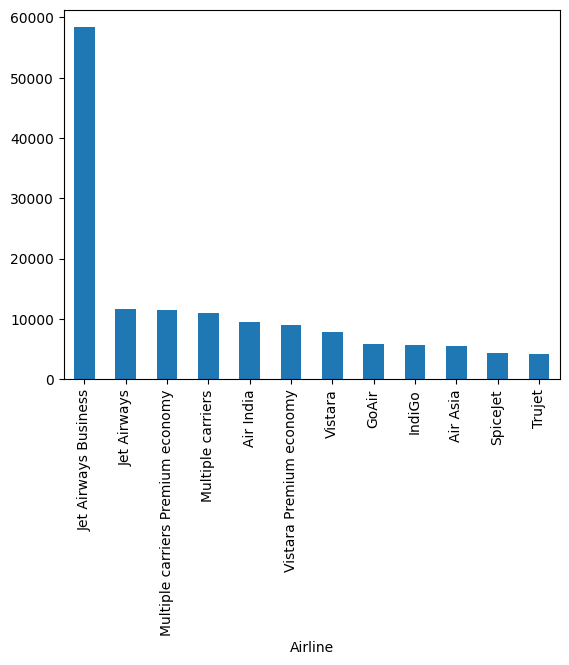

In [165]:
train_data.groupby('Airline')['Price'].mean().sort_values(ascending = False).plot(kind = 'bar')

In [161]:
train_data.dtypes

Airline            object
Source             object
Destination        object
Route              object
Total_Stops        object
Additional_Info    object
Price               int64
Year                int32
Month               int32
Date                int32
Dep_hrs             int32
Dep_mins            int32
Arrival_hrs         int32
Arrival_mins        int32
Duration_mins       int64
dtype: object

In [170]:
train_data.head(5)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Year,Month,Date,Dep_hrs,Dep_mins,Arrival_hrs,Arrival_mins,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,2019,3,24,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,2019,5,1,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,2019,6,9,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,2019,5,12,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,2019,3,1,16,50,21,35,285


In [171]:
train_data.drop('Route',axis = 1,inplace = True)

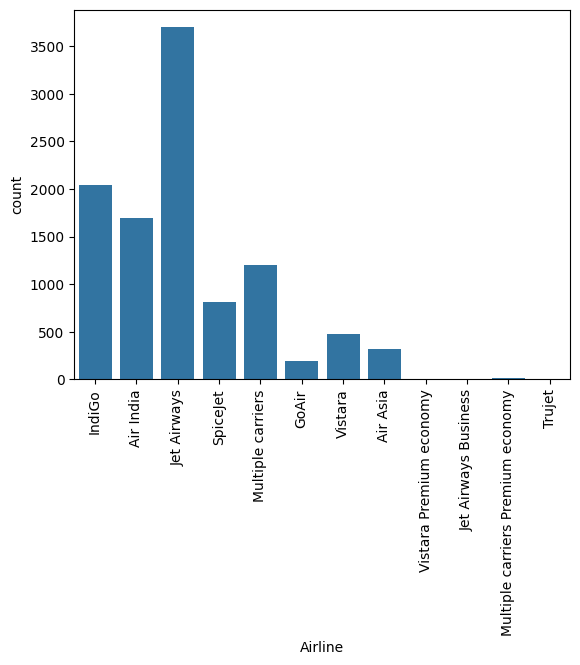

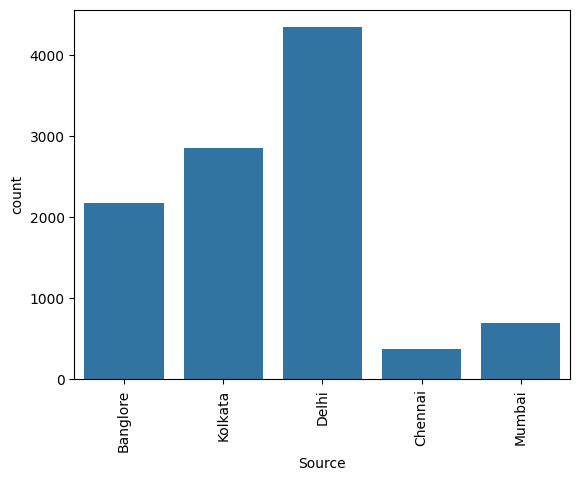

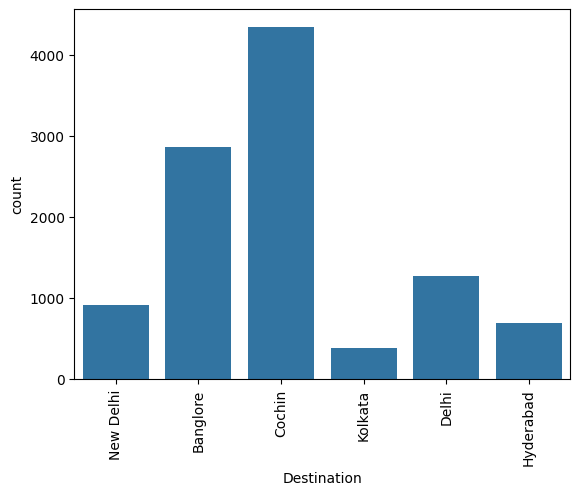

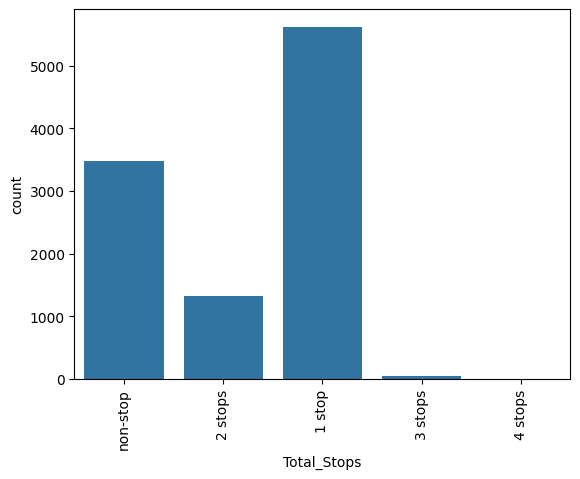

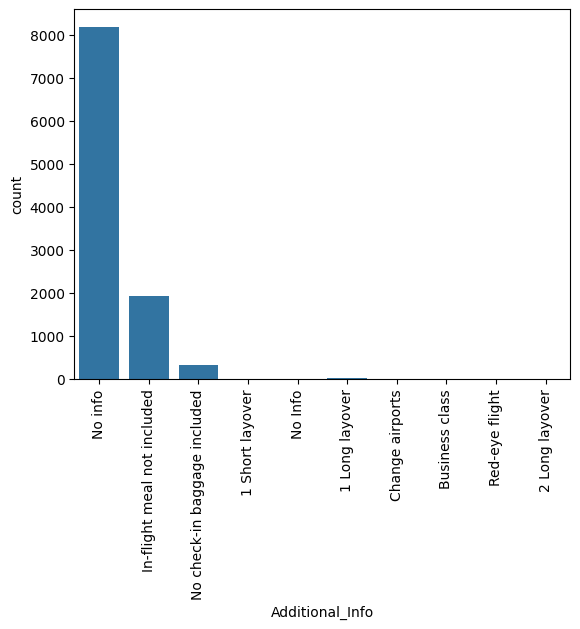

In [174]:
for i in train_data.select_dtypes(include = 'object').columns:
    sns.countplot(data= train_data,x = i)
    plt.xticks(rotation = 90)
    plt.show()

In [172]:
train_data.select_dtypes(include = 'object')

,Airline,Source,Destination,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,non-stop,No info
1,Air India,Kolkata,Banglore,2 stops,No info
2,Jet Airways,Delhi,Cochin,2 stops,No info
3,IndiGo,Kolkata,Banglore,1 stop,No info
4,IndiGo,Banglore,New Delhi,1 stop,No info
...,...,...,...,...,...
10457,Air Asia,Kolkata,Banglore,non-stop,No info
10458,Air India,Kolkata,Banglore,non-stop,No info
10459,Jet Airways,Banglore,Delhi,non-stop,No info
10460,Vistara,Banglore,New Delhi,non-stop,No info


In [176]:
train_data.drop('Additional_Info',axis =1, inplace = True)

### Bi_Variate Analysis

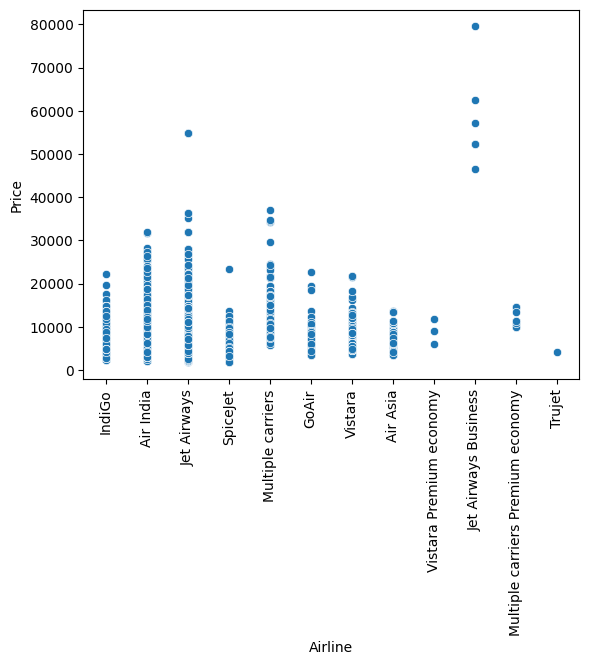

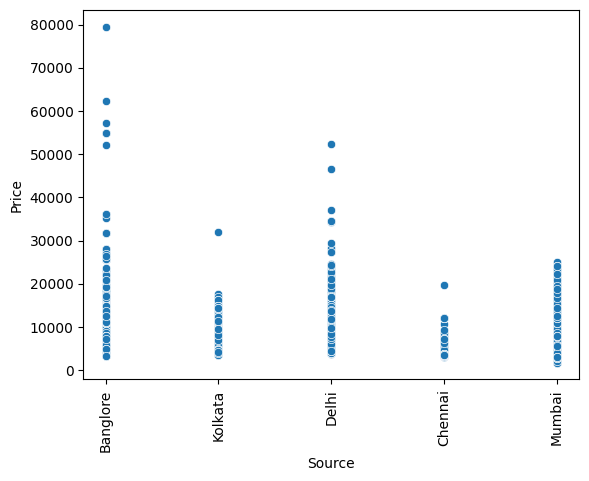

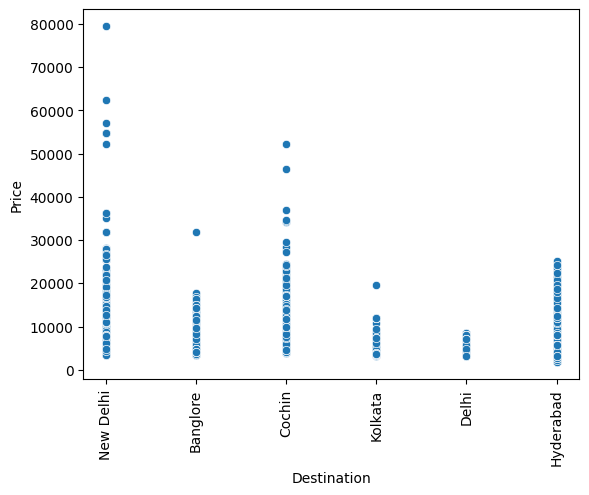

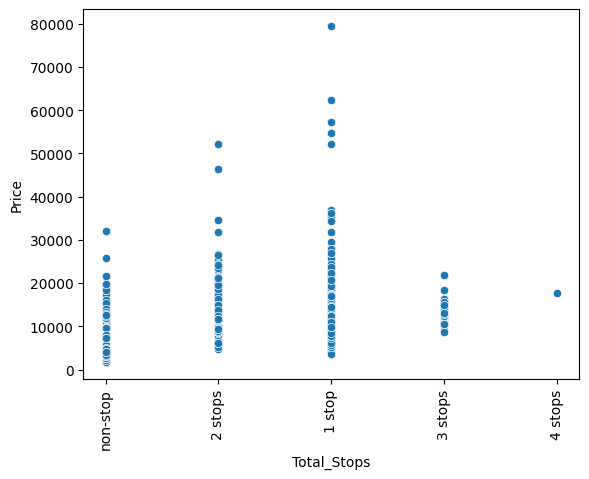

In [177]:
for i in train_data.select_dtypes(include = 'object').columns:
    sns.scatterplot(x = train_data[i],y = train_data.Price)
    plt.xticks(rotation = 90)
    plt.show()

In [181]:
train_data.head(2)

,Airline,Source,Destination,Total_Stops,Price,Year,Month,Date,Dep_hrs,Dep_mins,Arrival_hrs,Arrival_mins,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,2019,3,24,22,20,1,10,170
1,Air India,Kolkata,Banglore,2,7662,2019,5,1,5,50,13,15,445


In [179]:
train_data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [180]:
train_data.Total_Stops.replace({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4},inplace = True)

In [186]:
new_train_data = pd.get_dummies(train_data,drop_first = True).astype('int')

In [187]:
new_train_data.head(2)

,Total_Stops,Price,Year,Month,Date,Dep_hrs,Dep_mins,Arrival_hrs,Arrival_mins,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,2019,3,24,22,20,1,10,170,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,2019,5,1,5,50,13,15,445,...,0,0,0,1,0,0,0,0,0,0


In [189]:
X = new_train_data.drop('Price',axis = 1)
y = new_train_data['Price']

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [191]:
from sklearn.metrics import mean_squared_error

In [192]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [195]:
X_test.shape

(3139, 29)

In [196]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [198]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [199]:
mean_squared_error(y_train,y_train_pred)

7848739.71104696

In [201]:
np.sqrt(mean_squared_error(y_train,y_train_pred))

2801.560227988497

In [202]:
from sklearn.metrics import r2_score

In [203]:
r2_score(y_train,y_train_pred)

0.6367799086465608

In [204]:
r2_score(y_test,y_test_pred)

0.5885477874569578

In [205]:
models = [LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor()]

In [239]:
models[2]

RandomForestRegressor()

In [207]:
for i in range(3):
    models[i].fit(X_train,y_train)
    print(f'{models[i]}: ' )
    y_train_pred = models[i].predict(X_train)
    y_test_pred = models[i].predict(X_test)

    print('R2_score_train = ',r2_score(y_train,y_train_pred))
    print('R2_score_test = ',r2_score(y_test,y_test_pred))



LinearRegression(): 
R2_score_train =  0.6367799086465608
R2_score_test =  0.5885477874569578
DecisionTreeRegressor(): 
R2_score_train =  0.9735561267162748
R2_score_test =  0.697984336860769
RandomForestRegressor(): 
R2_score_train =  0.9563448472050966
R2_score_test =  0.7975557714192485


In [208]:
X_train

,Total_Stops,Year,Month,Date,Dep_hrs,Dep_mins,Arrival_hrs,Arrival_mins,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
8586,0,2019,4,6,20,0,22,50,170,0,...,0,0,0,0,0,0,1,0,0,0
4535,0,2019,4,24,22,20,0,40,140,0,...,0,0,0,1,0,0,0,0,0,0
10011,1,2019,3,6,8,55,18,50,595,0,...,0,0,1,0,0,1,0,0,0,0
4805,0,2019,5,3,20,0,22,50,170,0,...,0,0,0,0,0,0,1,0,0,0
6837,1,2019,5,9,10,0,20,25,625,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,1,2019,3,24,14,35,14,35,1440,1,...,0,0,0,1,0,0,0,0,0,0
4859,1,2019,3,21,15,0,1,35,635,0,...,0,0,1,0,0,1,0,0,0,0
3264,0,2019,6,24,17,45,20,5,140,0,...,0,1,0,0,0,0,0,0,1,0
9845,1,2019,6,24,16,0,19,0,1620,0,...,0,0,1,0,0,1,0,0,0,0


In [209]:
test_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [211]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [219]:
test_data_copy = test_data.copy(deep= True)

In [257]:
test_data = test_data_copy.copy(deep = True)

In [258]:
#  Test Data

# Date of Journey
test_data['Year'] = pd.to_datetime(test_data['Date_of_Journey'],format = '%d/%m/%Y').dt.year
test_data['Month'] = pd.to_datetime(test_data['Date_of_Journey'],format = '%d/%m/%Y').dt.month
test_data['Date'] = pd.to_datetime(test_data['Date_of_Journey'],format = '%d/%m/%Y').dt.day

test_data.drop('Date_of_Journey',axis =1,inplace = True)

# Dep_Time
test_data['Dep_hour'] = pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data['Dep_mins'] = pd.to_datetime(test_data['Dep_Time']).dt.minute
test_data.drop('Dep_Time',axis =1,inplace = True)

# Arrival Time
test_data['Arrival_hrs'] = pd.to_datetime(test_data['Arrival_Time']).dt.hour
test_data['Arrival_mins'] = pd.to_datetime(test_data['Arrival_Time']).dt.minute
test_data.drop('Arrival_Time',axis =1,inplace = True)

# Duration

duration = list(test_data['Duration'])

duration_hrs = []
duration_mins = []

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]


for i in range(len(duration)):
    duration_hrs.append(int(duration[i].split(' ')[0].split('h')[0]))
    duration_mins.append(int(duration[i].split(' ')[1].split('m')[0]))

duration_hm = []
for i in duration_hrs:
    duration_hm.append(i*60)
    
test_data['Duration_mins'] = [i+j  for i,j  in zip(duration_hm, duration_mins)]

test_data.drop('Duration',axis =1,inplace = True)


# Route
test_data.drop('Route',axis =1,inplace = True)

# Total_Stops
test_data.Total_Stops.replace({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4},inplace = True)

# Additional Info
test_data.drop('Additional_Info',axis =1,inplace = True)


# Get Dummies
test_data = pd.get_dummies(test_data,drop_first = True).astype('int')


In [264]:
test_data['Airline_Trujet']  = 1

In [235]:
test_data.shape

(2671, 29)

In [236]:
X_train.shape

(7323, 29)

In [ ]:
RandomForestRegressor

In [263]:
test_data.rename(columns = {'Dep_hour':'Dep_hrs'},inplace = True)

In [260]:
test_data.columns

Index(['Total_Stops', 'Date', 'Year', 'Month', 'Dep_hour', 'Dep_mins',
       'Arrival_hrs', 'Arrival_mins', 'Duration_mins', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [261]:
X_train.columns

Index(['Total_Stops', 'Year', 'Month', 'Date', 'Dep_hrs', 'Dep_mins',
       'Arrival_hrs', 'Arrival_mins', 'Duration_mins', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [266]:
test_data  = test_data[['Total_Stops', 'Year', 'Month', 'Date', 'Dep_hrs', 'Dep_mins',
       'Arrival_hrs', 'Arrival_mins', 'Duration_mins', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [259]:
test_data.head()

,Total_Stops,Date,Year,Month,Dep_hour,Dep_mins,Arrival_hrs,Arrival_mins,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,2019,6,17,30,4,25,655,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,2019,5,6,20,10,20,240,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,2019,5,19,15,19,0,1425,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,2019,5,8,0,21,0,780,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,2019,6,23,55,2,45,170,0,...,0,0,0,0,0,0,1,0,0,0


In [256]:
X_train.head(2)

,Total_Stops,Year,Month,Date,Dep_hrs,Dep_mins,Arrival_hrs,Arrival_mins,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
8586,0,2019,4,6,20,0,22,50,170,0,...,0,0,0,0,0,0,1,0,0,0
4535,0,2019,4,24,22,20,0,40,140,0,...,0,0,0,1,0,0,0,0,0,0


In [249]:
test_data.columns

Index(['Total_Stops', 'Date', 'Month', 'Year', 'Dep_hrs', 'Dep_mins',
       'Arrival_hrs', 'Arrival_mins', 'Duration_mins', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Airline_Trujet'],
      dtype='object')

In [268]:
test_data['Predicted_Price'] = models[2].predict(test_data)

In [271]:
test_data['Predicted_Price'].to_csv('predicted_price.csv')

In [269]:
test_data

,Total_Stops,Year,Month,Date,Dep_hrs,Dep_mins,Arrival_hrs,Arrival_mins,Duration_mins,Airline_Air India,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Predicted_Price
0,1,2019,6,6,17,30,4,25,655,0,...,0,1,0,0,1,0,0,0,0,10458.720000
1,1,2019,5,12,6,20,10,20,240,0,...,0,0,1,0,0,0,0,0,0,4225.140000
2,1,2019,5,21,19,15,19,0,1425,0,...,0,1,0,0,1,0,0,0,0,15062.996667
3,1,2019,5,21,8,0,21,0,780,0,...,0,1,0,0,1,0,0,0,0,12195.753333
4,0,2019,6,24,23,55,2,45,170,0,...,0,0,0,0,0,1,0,0,0,3752.280000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,2019,6,6,20,30,20,25,1435,1,...,0,0,1,0,0,0,0,0,0,10191.600000
2667,0,2019,3,27,14,20,16,55,155,0,...,0,0,1,0,0,0,0,0,0,5121.790000
2668,1,2019,3,6,21,50,4,25,395,0,...,0,1,0,0,1,0,0,0,0,15744.093905
2669,1,2019,3,6,4,0,19,15,915,1,...,0,1,0,0,1,0,0,0,0,13700.040000


In [231]:
list1 = test_data.columns
list2 = X_train.columns

In [232]:
set(list2) - set(list1)

{'Airline_Trujet', 'Dep_hrs'}

In [233]:
set(list1) - set(list2)

{'Dep_hour'}

In [221]:
test_data.shape

(2671, 33)

In [218]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24


In [217]:
pd.to_datetime(test_data['Arrival_Time']).dt.hour

0        4
1       10
2       19
3       21
4        2
        ..
2666    20
2667    16
2668     4
2669    19
2670    19
Name: Arrival_Time, Length: 2671, dtype: int32

In [215]:
pd.to_datetime(test_data['Date_of_Journey'],format = '%d/%m/%Y').dt.day

0        6
1       12
2       21
3       21
4       24
        ..
2666     6
2667    27
2668     6
2669     6
2670    15
Name: Date_of_Journey, Length: 2671, dtype: int32